# 02 Build Knowledge Graph

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aabharan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aabharan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


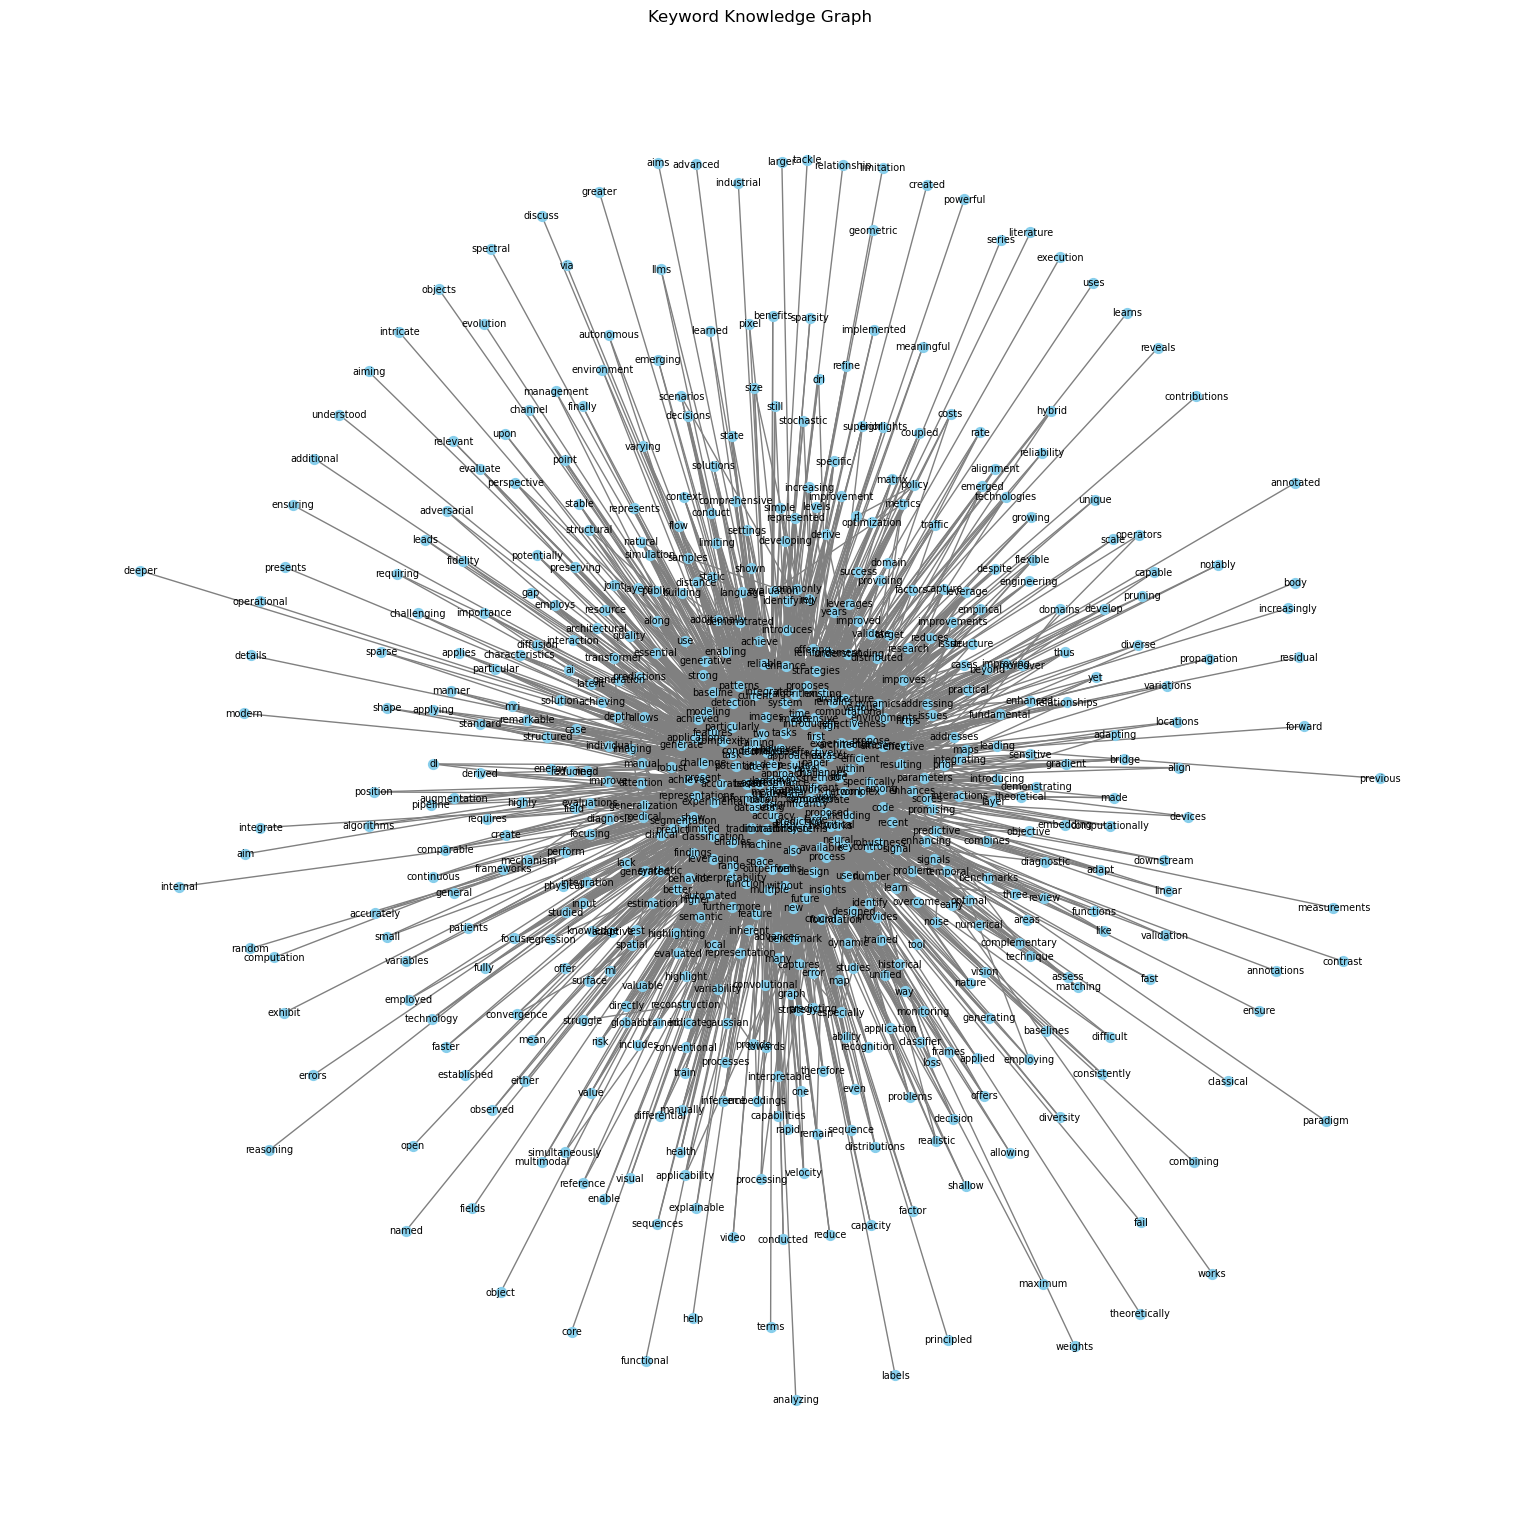

In [3]:


import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from itertools import combinations
from collections import defaultdict
import os

os.makedirs("../outputs", exist_ok=True)

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("../data/raw/arxiv_papers.csv")
stop_words = set(stopwords.words("english"))

def extract_keywords(text):
    tokens = word_tokenize(text.lower())
    return [t for t in tokens if t.isalpha() and t not in stop_words]

co_occurrence = defaultdict(int)
for summary in df["summary"]:
    keywords = extract_keywords(summary)
    for w1, w2 in combinations(set(keywords), 2):
        co_occurrence[(w1, w2)] += 1

G = nx.Graph()
for (w1, w2), weight in co_occurrence.items():
    if weight > 3:
        G.add_edge(w1, w2, weight=weight)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.2)
nx.draw(G, pos, node_color='skyblue', edge_color='gray', with_labels=True, node_size=50, font_size=7)
plt.title("Keyword Knowledge Graph")
plt.show()

nx.write_gexf(G, "../outputs/knowledge_graph.gexf")